In [1]:
import gymnasium as gym
import random
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

env = gym.make("Taxi-v3", render_mode="ansi")

Episode: 100000
Training finished.



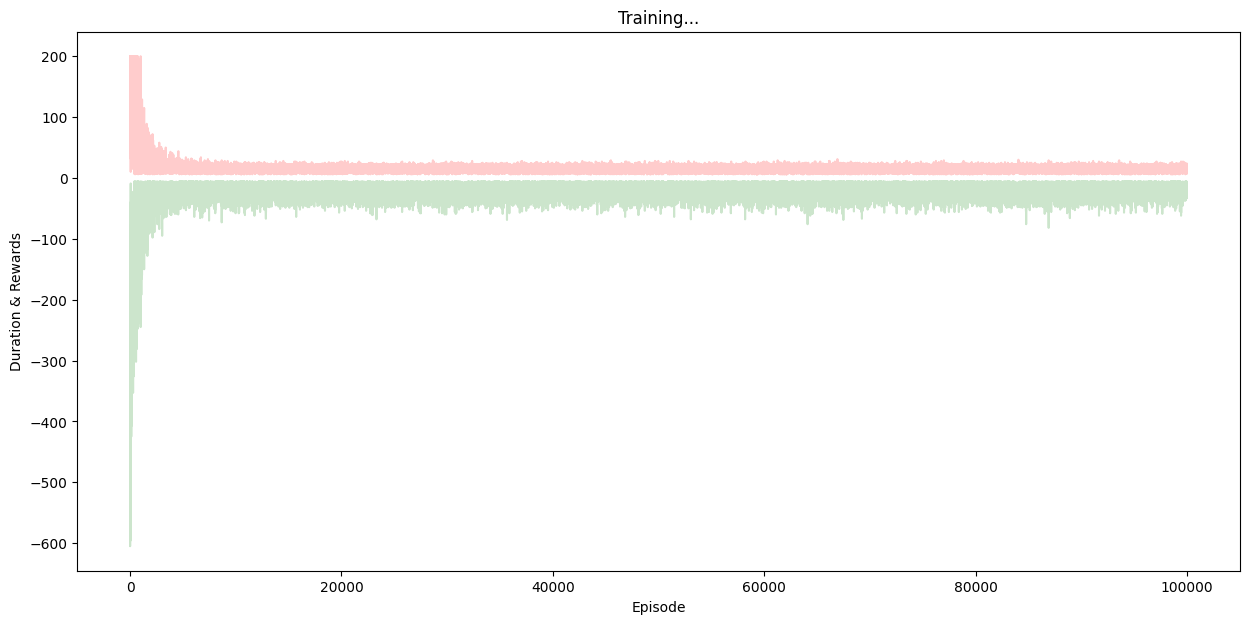

In [2]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state, info = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, terminated, truncated, _ = env.step(action) 
        
        done = terminated or truncated
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward < 0:
            penalties += reward

        state = next_state
        epochs += 1
        
    all_penalties.append(penalties)
    all_epochs.append(epochs)
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")


print("Training finished.\n")
fig = plt.figure(1, figsize=(15, 7))
plt.clf()
ax1 = fig.add_subplot(111)

plt.title('Training...')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Duration & Rewards')
ax1.plot(all_epochs, label='Duration', alpha=0.2, color='r')
ax1.plot(all_penalties, label='Rewards', alpha=0.2, color='g')

In [19]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100

for i in range(episodes):
    state, info = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        next_state, reward, terminated, truncated, _ = env.step(action)
        
        state = next_state

        done = terminated or truncated

        if reward < 0:
            penalties += reward

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs
    
    

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 100 episodes:
Average timesteps per episode: 13.05
Average penalties per episode: -12.05


In [6]:
import time
import matplotlib

is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display
    
actions_str = ["South", "North", "East", "West", "Pickup", "Dropoff"]

iteration = 0
state, info = env.reset()  # reset environment to a new, random state
env.render()
time.sleep(0.02)
terminated = False

while not terminated:
    action = np.argmax(q_table[state])
    iteration += 1
    state, reward, terminated, truncated, _ = env.step(action.item())
    display.clear_output(wait=True)
    print(env.render())
    print(f"Iter: {iteration} - Action: {action}({actions_str[action]}) - Reward {reward}")
    time.sleep(0.5)
    if iteration == 200:
        print("cannot converge :(")
        break

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Iter: 10 - Action: 5(Dropoff) - Reward 20
